# DecisionTreeClassifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('A.csv')
data.head()

,ASF,eTIV,nWBV,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,Group
0,0.883,1987,0.696,1,0,M,R,87,14,2.0,27.0,0.0,Nondemented
1,0.876,2004,0.681,2,457,M,R,88,14,2.0,30.0,0.0,Nondemented
2,1.046,1678,0.736,1,0,M,R,75,12,NaN,23.0,0.5,Demented
3,1.010,1738,0.713,2,560,M,R,76,12,NaN,28.0,0.5,Demented
4,1.034,1698,0.701,3,1895,M,R,80,12,NaN,22.0,0.5,Demented


In [3]:
df=data.dropna()
df

,ASF,eTIV,nWBV,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,Group
0,0.883,1987,0.696,1,0,M,R,87,14,2.0,27.0,0.0,Nondemented
1,0.876,2004,0.681,2,457,M,R,88,14,2.0,30.0,0.0,Nondemented
5,1.444,1215,0.710,1,0,F,R,88,18,3.0,28.0,0.0,Nondemented
6,1.462,1200,0.718,2,538,F,R,90,18,3.0,27.0,0.0,Nondemented
7,1.039,1689,0.712,1,0,M,R,80,12,4.0,28.0,0.0,Nondemented
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1.037,1693,0.694,2,842,M,R,82,16,1.0,28.0,0.5,Demented
369,1.040,1688,0.675,3,2297,M,R,86,16,1.0,26.0,0.5,Demented
370,1.331,1319,0.801,1,0,F,R,61,13,2.0,30.0,0.0,Nondemented
371,1.323,1327,0.796,2,763,F,R,63,13,2.0,30.0,0.0,Nondemented


In [4]:
df.columns

Index(['ASF', 'eTIV', 'nWBV', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age',
       'EDUC', 'SES', 'MMSE', 'CDR', 'Group'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Group','M/F','Hand']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [6]:
x = df.drop(labels='Group', axis=1)
y = df.loc[:,'Group']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42, stratify=y)
print("Number of training dataset : ", len(x_train))
print("Number of test dataset     : ", len(x_test))
print("Total number of dataset    : ", len(x_train)+len(x_test))

Number of training dataset :  247
Number of test dataset     :  107
Total number of dataset    :  354


In [8]:
x_train

,ASF,eTIV,nWBV,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR
67,1.320,1329,0.733,2,405,0,0,89,12,4.0,27.0,0.0
186,1.175,1494,0.661,2,751,1,0,80,12,4.0,20.0,1.0
150,1.037,1692,0.723,2,672,1,0,82,17,1.0,29.0,0.0
20,1.326,1323,0.738,2,730,0,0,80,16,2.0,29.0,0.0
68,1.291,1359,0.789,1,0,0,0,69,13,4.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
330,1.026,1710,0.760,2,580,1,0,79,20,1.0,25.0,2.0
346,1.250,1404,0.710,1,0,1,0,84,16,2.0,30.0,0.0
160,1.167,1504,0.769,5,2517,0,0,77,14,3.0,29.0,0.0
230,1.006,1744,0.670,2,766,1,0,83,11,4.0,29.0,0.0


In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, hamming_loss
from sklearn.model_selection import cross_val_score
from sklearn.tree import  DecisionTreeClassifier

In [10]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predicted = DTC.predict(x_test)

In [11]:
cr = classification_report(y_test,predicted)
print('Classification report of DecisionTreeClassifier Result is:\n',cr)
print("\n")

Classification report of DecisionTreeClassifier Result is:
               precision    recall  f1-score   support

           0       0.33      0.27      0.30        11
           1       0.94      0.87      0.90        38
           2       0.86      0.93      0.89        58

    accuracy                           0.84       107
   macro avg       0.71      0.69      0.70       107
weighted avg       0.83      0.84      0.84       107





In [12]:
cm = confusion_matrix(y_test,predicted)
print('Confusion Matrix result of DecisionTreeClassifier is:\n',cm)
print("\n")

Confusion Matrix result of DecisionTreeClassifier is:
 [[ 3  2  6]
 [ 2 33  3]
 [ 4  0 54]]




In [13]:
accuracy = cross_val_score(DTC, x, y, scoring='accuracy')
print('Cross validation test results of accuracy:', accuracy*100)
print("\n")

Cross validation test results of accuracy: [84.50704225 78.87323944 88.73239437 83.09859155 88.57142857]




In [14]:
a = accuracy.mean() * 100
print("Mean cross validation score of DecisionTreeClassifier is:",a)

Mean cross validation score of DecisionTreeClassifier is: 84.75653923541249


In [15]:
a = accuracy_score(y_test,predicted)
print("Accuracy Result of DecisionTreeClassifier is:", a*100)

Accuracy Result of DecisionTreeClassifier is: 84.11214953271028


In [16]:
hl = hamming_loss(y_test,predicted)
print("Hamming Loss Of GradientBoostingClassifier is:", hl*100)

Hamming Loss Of GradientBoostingClassifier is: 15.887850467289718


Confusion matrix-DecisionTreeClassifier:
[[ 3  2  6]
 [ 2 33  3]
 [ 4  0 54]]


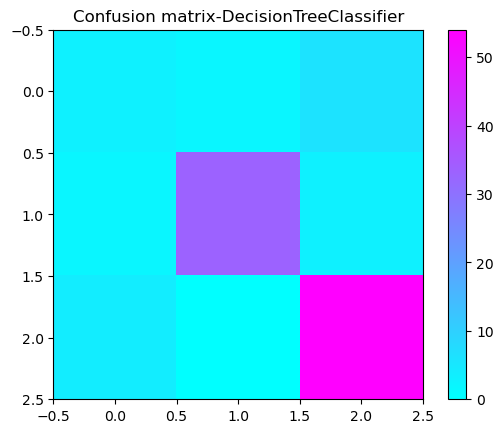

In [17]:
def plot_confusion_matrix(cm, title='Confusion matrix-DecisionTreeClassifier', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('Confusion matrix-DecisionTreeClassifier:')
print(cm)
plot_confusion_matrix(cm)

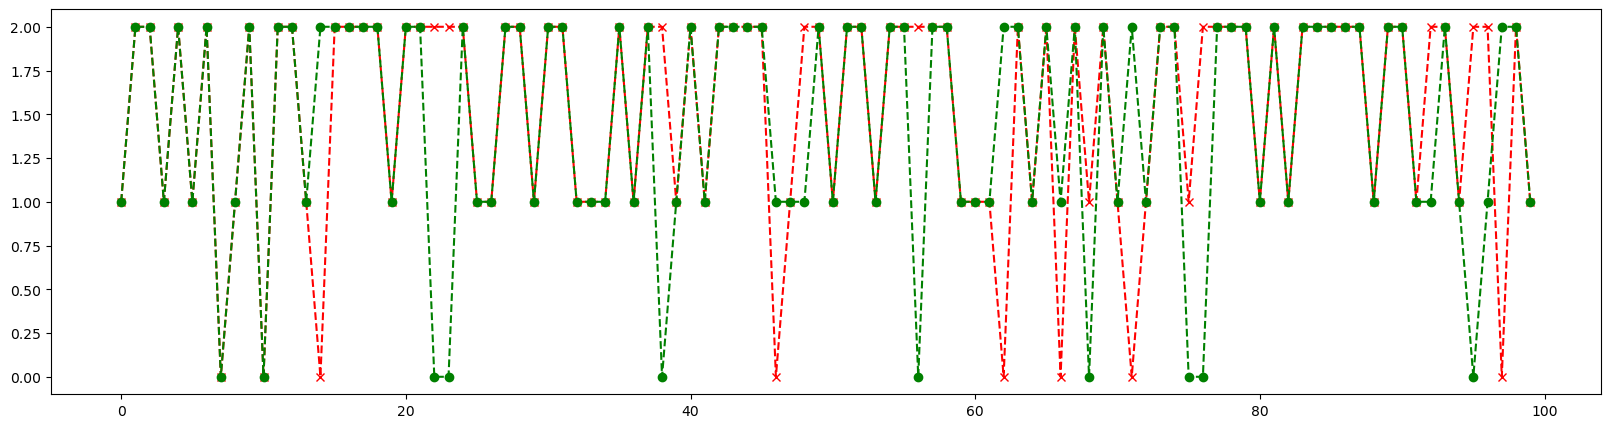

In [18]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()